<h2 style = "font-weight: 700; text-align: center">Convolutional Neural Network (CNN) for Image pattern recognition</h2>

In [129]:
import keras
import tensorflow as tf
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils.vis_utils import plot_model

#### Importing the dataset

In [130]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [131]:
# print(x_train[0])       # 28 rows(arrays) of 28 values 
# print(y_train[0])       # Singular integer value corresponding to the number the image has

#### Train-Test Split

In [132]:
# print(x_train.shape)
# print(y_train.shape)
x_train = x_train.reshape(60000, 28, 28)        # 60000 images (outer rows) each made up of 28 arrays (rows) with 28 values (columns) (28 x 28) 
x_test = x_test.reshape(x_test.shape[0], 28, 28)
print(x_test.shape)
input_shape = (28, 28, 1)                       # when training the model this has to be specified and it takes x y and z
y_train = keras.utils.to_categorical(y_train, 10)
# print(y_train.shape)
y_test = keras.utils.to_categorical(y_test, 10)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

(10000, 28, 28)


###### Categorical (One-Hot Encoded) array was formed from the y_train (and test too) we take out from the dataset, this is how data is usually represented in the output layer (when categorical data) and we calculate the loss by comparing the calculated output y (same dims as this array) and the corresponding array itself

#### Preview of the data in the dataset

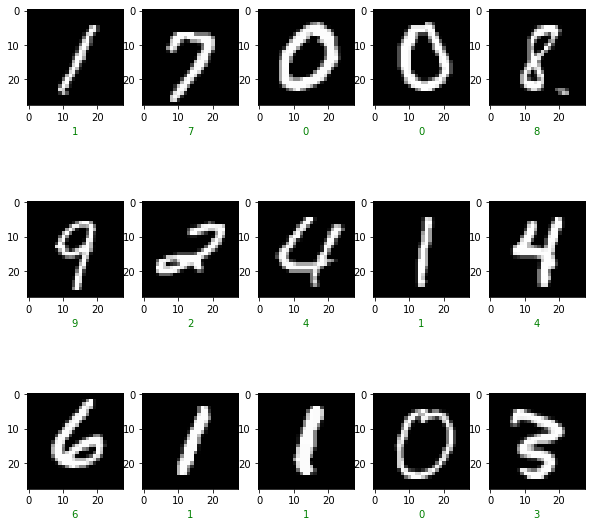

In [133]:
fig = plt.figure(figsize = (10, 10))

for i in range(1, (3 * 5) + 1):
  rn = np.random.randint(50000)
  fig.add_subplot(3, 5, i)          # subplot automatically adds the image row wise
  plt.imshow(x_train[rn], cmap = 'gray')
  plt.xlabel(np.argmax(y_train[rn]), color = 'g')
  
plt.show()

#### Parameter selection

In [134]:
x_train /= 255          #normalizing the input
x_test /= 255

batch_size = 64
num_classes = 10
epochs = 10

#### Building the model

In [135]:
def build_model(optimizer):
  model = Sequential()

  model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = input_shape))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  
  model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (2, 2)))
  
  model.add(Dropout(0.25))
  model.add(Flatten())
  
  model.add(Dense(256, activation = 'relu'))
  model.add(Dropout(0.5))
  
  model.add(Dense(num_classes, activation = 'softmax'))
  model.compile(loss = keras.losses.categorical_crossentropy, optimizer = optimizer, metrics = ['accuracy'])
  model.summary()
  
  return model

#### Fitting the model

In [136]:
model = build_model('Adam')
# plot_model(model, to_file = "mnist model"+ '.jpg', show_shapes = True)    # have already executed it once
hist = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (x_test, y_test))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 5, 5, 32)          0         
                                                                 
 flatten_8 (Flatten)         (None, 800)              

#### Evaluating model fit

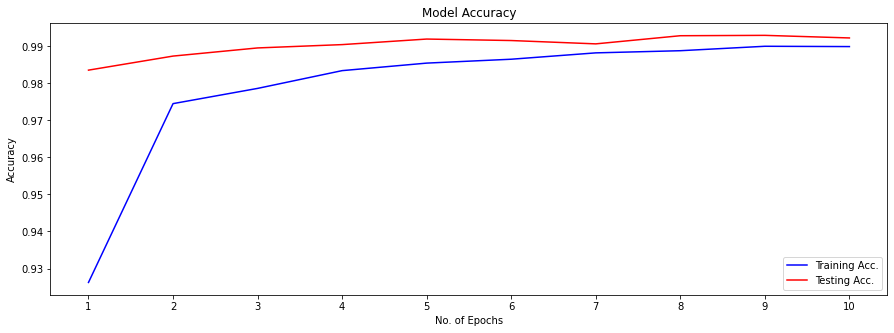

In [137]:
y1 = hist.history['accuracy']
y2 = hist.history['val_accuracy']

plt.figure(figsize=(15, 5))
plt.title("Model Accuracy")
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.plot([i for i in range(1, 11)], y1, color='b')
plt.plot([i for i in range(1, 11)], y2, color='r')
plt.xticks([i for i in range(1, 11)])
plt.legend(['Training Acc.', 'Testing Acc.'], loc = 'best')
plt.show()

In [138]:
y_pred = model.predict(x_test)
print(y_pred[0])

313/313 [==============================] - 1s 3ms/step
[3.2042192e-11 2.6431319e-09 3.1167480e-07 6.7301173e-08 5.0745981e-09
 2.4627089e-11 1.6341132e-14 9.9999952e-01 1.0177085e-10 2.1788399e-08]


#### Converting to original numbers
<p style = "font-size: 16px">Indices of the highest softmax value (probability) is the number (digit) in the image itself. We had originally One-Hot Encoded the 'y' array in this way only.</p>

In [139]:
y_pred_num_only = [np.argmax(i) for i in y_pred]

In [140]:
y_test_num_only = [np.argmax(i) for i in y_test]

In [141]:
incorr = 0
incorr_indices = []
for i in range(len(y_test)):
    if (y_test_num_only[i] != y_pred_num_only[i]):
        incorr += 1
        incorr_indices.append(i)

print(f"No. of Incorrect: {(incorr)} / {(len(y_test_num_only))}")

No. of Incorrect: 77 / 10000


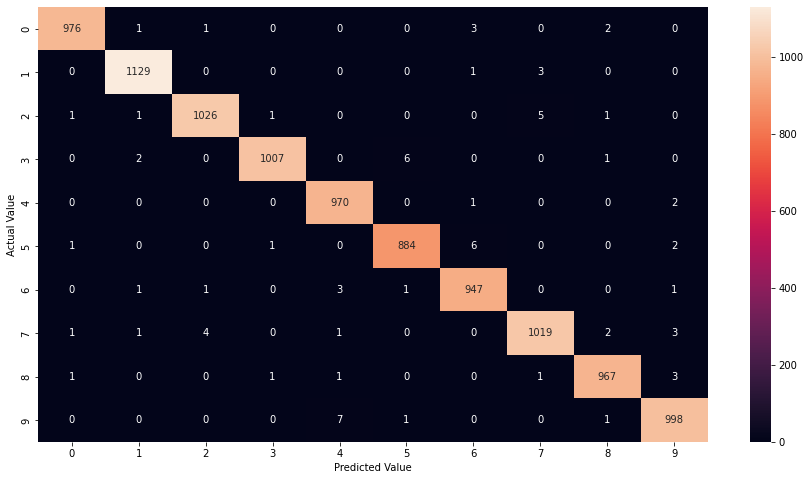

In [142]:
con_mat = tf.math.confusion_matrix(labels = y_pred_num_only, predictions = y_test_num_only)
plt.figure(figsize = (15, 8))
sns.heatmap(con_mat, annot = True, fmt = 'd')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()

#### Incorrect Plots

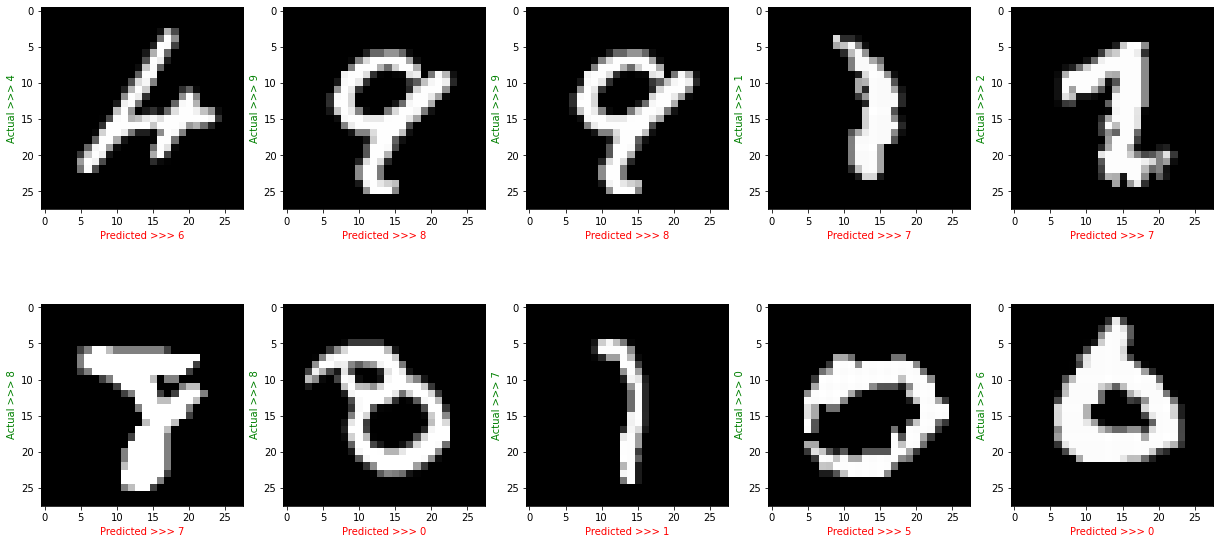

In [143]:
fig = plt.figure(figsize = (21, 10))

for i in range(1, (2 * 5) + 1):
        # rn = np.random.randint(10000-len(incorr))
        j = np.random.randint(len(incorr_indices))
        rn = incorr_indices[j]
        if(y_test_num_only[rn] != y_pred_num_only[rn]):
                fig.add_subplot(2, 5, i)
                plt.imshow(x_test[rn], cmap = 'gray')
                plt.xlabel(f'Predicted >>> {y_pred_num_only[rn]}', color = 'r')
                plt.ylabel(f'Actual >>> {y_test_num_only[rn]}', color = 'g')
plt.show()